In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
dataset_path = Path(r"./captum/Blue_waters_captum_test_data.csv")

In [3]:
df = pd.read_csv(Path(r"./captum/Blue_waters_captum_ig_result.csv"))
df_dl = pd.read_csv(Path(r"./captum/Blue_waters_captum_dl_result.csv"))

In [4]:
df_data = pd.read_csv(dataset_path)
df_data.head()

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs
0,0,588955,169,-26,-26,1559,1641,2635,480,0,...,833,152,2,0,0,0,0,0,0,11
1,1,253293,8709,-288,-288,1400634,6329265,2013885,28430,0,...,73,9,25830,506,0,0,0,0,-1,256
2,2,435591,169,-26,-26,1559,1641,2635,480,0,...,589,286,112,0,0,0,0,0,4,11
3,3,54849,1736,-66,-66,94172,44324,104965,3407,0,...,19652,5339,2588,179,0,0,0,0,-1,64
4,4,711505,113,-13,-13,45728,10982,75,224,0,...,10927,0,0,0,0,0,0,0,-1,16


In [5]:
df.head()

,Unnamed: 0,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,...,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs
0,0,0.000047,-0.000301,0.000275,-0.000067,1.057339e-05,-0.000147,-0.000844,0.000043,-0.000017,...,-0.000131,-0.000098,-0.000057,-0.000054,-0.000018,0.000003,-0.000036,0.000056,-0.000129,0.000051
1,1,0.000021,-0.000024,0.000109,-0.000024,8.364518e-07,-0.000016,-0.000080,-0.000008,0.000061,...,0.000022,-0.000220,-0.000039,0.000087,0.000007,0.000007,0.000036,0.000043,-0.000017,-0.000027
2,2,0.000049,-0.000293,0.000281,-0.000072,7.884574e-06,-0.000145,-0.000861,0.000041,-0.000018,...,-0.000133,-0.000105,-0.000059,-0.000046,-0.000017,0.000002,-0.000036,0.000053,-0.000035,0.000055
3,3,0.000042,-0.000289,0.000273,-0.000061,5.985128e-06,-0.000138,-0.000799,0.000042,-0.000016,...,-0.000124,-0.000077,-0.000052,-0.000051,-0.000018,0.000005,-0.000035,0.000054,-0.000158,0.000039
4,4,0.000047,-0.000298,0.000283,-0.000067,1.197897e-05,-0.000146,-0.000857,0.000043,-0.000017,...,-0.000125,-0.000102,-0.000058,-0.000050,-0.000018,0.000004,-0.000036,0.000056,-0.000151,0.000058


In [6]:
df_dl.head()

,Unnamed: 0,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,...,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs
0,0,0.000045,-0.000305,0.000286,-0.000054,-0.000010,-0.000135,-0.001003,0.000041,-0.000013,...,-1.289480e-04,-0.000117,-0.000019,-0.000070,-0.000014,0.000002,-0.000033,0.000058,-0.000148,0.000037
1,1,0.000026,0.000014,0.000121,-0.000022,0.000001,-0.000012,-0.000084,0.000003,0.000051,...,-2.927772e-07,-0.000252,-0.000063,0.000082,0.000012,0.000010,0.000035,0.000050,-0.000065,-0.000028
2,2,0.000050,-0.000296,0.000293,-0.000057,-0.000014,-0.000135,-0.001019,0.000040,-0.000015,...,-1.276026e-04,-0.000122,-0.000021,-0.000057,-0.000013,0.000001,-0.000034,0.000056,-0.000039,0.000034
3,3,0.000042,-0.000297,0.000282,-0.000049,-0.000014,-0.000128,-0.000937,0.000041,-0.000013,...,-1.214282e-04,-0.000089,-0.000027,-0.000060,-0.000014,0.000003,-0.000034,0.000057,-0.000175,0.000024
4,4,0.000046,-0.000304,0.000292,-0.000054,-0.000010,-0.000135,-0.001011,0.000041,-0.000014,...,-1.230545e-04,-0.000118,-0.000021,-0.000066,-0.000014,0.000002,-0.000034,0.000057,-0.000173,0.000041


In [7]:
df_diff = df_dl - df
df_diff.describe().transpose()  #.abs().sort_values(ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,105972.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
POSIX_OPENS,105972.0,2.538248e-06,0.000110,-0.004928,-1.403853e-06,-1.278420e-07,3.845739e-06,0.005966
POSIX_FILENOS,105972.0,-1.357912e-05,0.000340,-0.033732,-6.706617e-06,-4.413890e-06,1.204020e-05,0.015673
POSIX_DUPS,105972.0,1.111590e-06,0.000283,-0.044859,-7.679010e-07,8.811728e-06,1.067699e-05,0.015376
POSIX_READS,105972.0,6.255950e-06,0.000189,-0.030651,1.769745e-06,9.241001e-06,1.270133e-05,0.006315
...,...,...,...,...,...,...,...,...
WRITE_10M_100M,105972.0,7.184854e-07,0.000199,-0.008039,-1.258219e-06,-8.360395e-07,3.015047e-06,0.059256
WRITE_100M_1G,105972.0,3.429087e-06,0.000164,-0.034464,-1.501266e-06,1.620136e-06,2.780538e-06,0.018605
WRITE_1G_PLUS,105972.0,-1.837987e-07,0.000096,-0.020053,-1.513273e-06,1.784376e-06,2.562621e-06,0.008455
rank,105972.0,-1.928696e-05,0.000129,-0.020057,-2.535790e-05,-2.160057e-05,-1.082769e-05,0.008357


**Attention: std sensitive to outliers?**

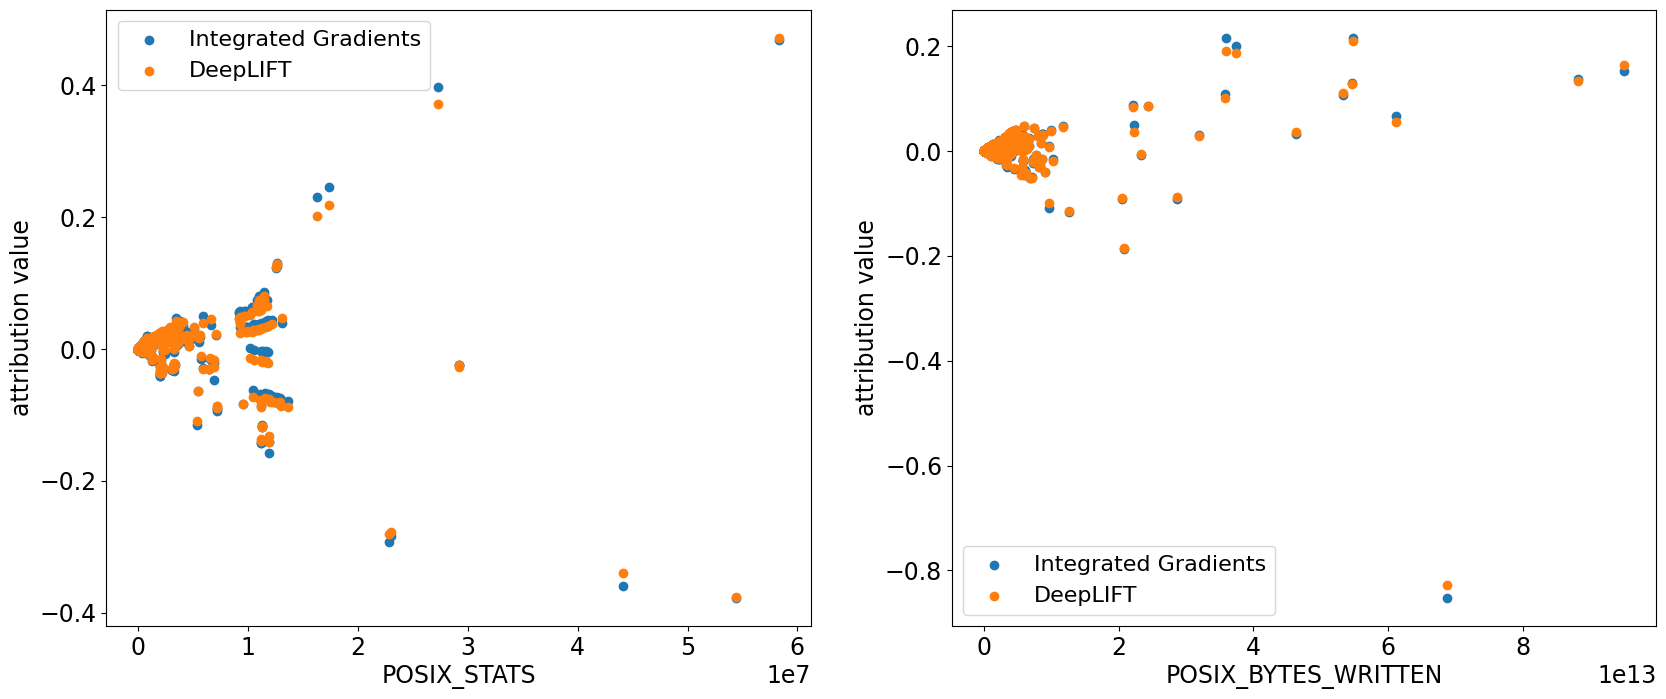

In [8]:
plt.rcParams.update({'font.size': 17})
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(20,8))
stats_ig = axs[0].scatter(x=df_data.POSIX_STATS, y=df.POSIX_STATS)
stats_dl = axs[0].scatter(x=df_data.POSIX_STATS, y=df_dl.POSIX_STATS)
axs[0].legend((stats_ig,stats_dl), ("Integrated Gradients", "DeepLIFT"), prop={'size': 16})
axs[0].set_xlabel("POSIX_STATS")
axs[0].set_ylabel("attribution value")
bytes_ig = axs[1].scatter(x=df_data.POSIX_BYTES_WRITTEN, y=df.POSIX_BYTES_WRITTEN, label="Integrated Gradients")
bytes_dl = axs[1].scatter(x=df_data.POSIX_BYTES_WRITTEN, y=df_dl.POSIX_BYTES_WRITTEN, label="DeepLIFT")
axs[1].legend((bytes_ig,bytes_dl), ("Integrated Gradients", "DeepLIFT"), prop={'size': 16})
axs[1].set_xlabel("POSIX_BYTES_WRITTEN")
axs[1].set_ylabel("attribution value")
plt.savefig("../results/interpretability/Blue_Waters_captum_difference_plot.png", format="png", bbox_inches="tight", dpi=600)

In [9]:
df_diff["POSIX_OPENS"].sort_values(ascending=False).head()

100117    0.005966
46172     0.005956
66042     0.005687
96441     0.005561
1391      0.005459
Name: POSIX_OPENS, dtype: float64

In [10]:
df_data.iloc[29918]

Unnamed: 0         29918
index             233946
POSIX_OPENS          169
POSIX_FILENOS        -26
POSIX_DUPS           -26
                   ...  
WRITE_10M_100M         0
WRITE_100M_1G          0
WRITE_1G_PLUS          0
rank                   0
nprocs                11
Name: 29918, Length: 91, dtype: int64

In [11]:
df.iloc[29918].POSIX_OPENS

4.647334e-05

In [12]:
df_dl.iloc[29918].POSIX_OPENS

4.5037286e-05

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,105972.0,52985.500000,30591.625701,0.000000,26492.750000,52985.500000,79478.250000,105971.000000
POSIX_OPENS,105972.0,0.000012,0.000658,-0.065405,0.000022,0.000046,0.000047,0.037252
POSIX_FILENOS,105972.0,-0.000142,0.003139,-0.345981,-0.000298,-0.000276,-0.000110,0.245351
POSIX_DUPS,105972.0,0.000046,0.003072,-0.248202,0.000112,0.000261,0.000282,0.081889
POSIX_READS,105972.0,0.000064,0.009243,-0.090722,-0.000067,-0.000061,-0.000025,1.448236
...,...,...,...,...,...,...,...,...
WRITE_10M_100M,105972.0,-0.000011,0.003374,-0.919276,0.000003,0.000004,0.000008,0.190161
WRITE_100M_1G,105972.0,-0.000001,0.001528,-0.322688,-0.000036,-0.000033,0.000009,0.272769
WRITE_1G_PLUS,105972.0,0.000026,0.004655,-0.953467,0.000049,0.000055,0.000056,0.013936
rank,105972.0,-0.000093,0.001099,-0.138258,-0.000151,-0.000131,-0.000043,0.055550


Compute distance to baseline per row. Baseline output is about 75, so be careful with the interpretation around ig_value of 0!

In [14]:
df.sum(axis=1).describe()

count    105972.000000
mean      52985.488402
std       30591.625659
min          -0.009231
25%       26492.741833
50%       52985.491016
75%       79478.246401
max      105970.990814
dtype: float64

In [15]:
df_dl.sum(axis=1).describe()

count    105972.000000
mean      52985.488402
std       30591.625659
min          -0.009146
25%       26492.741786
50%       52985.491001
75%       79478.246387
max      105970.990842
dtype: float64

In [16]:
df_data.nprocs

0          11
1         256
2          11
3          64
4          16
         ... 
105967    466
105968     11
105969     16
105970    256
105971     32
Name: nprocs, Length: 105972, dtype: int64

In [17]:
df_data.index

RangeIndex(start=0, stop=105972, step=1)

In [18]:
df_data.head()

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs
0,0,588955,169,-26,-26,1559,1641,2635,480,0,...,833,152,2,0,0,0,0,0,0,11
1,1,253293,8709,-288,-288,1400634,6329265,2013885,28430,0,...,73,9,25830,506,0,0,0,0,-1,256
2,2,435591,169,-26,-26,1559,1641,2635,480,0,...,589,286,112,0,0,0,0,0,4,11
3,3,54849,1736,-66,-66,94172,44324,104965,3407,0,...,19652,5339,2588,179,0,0,0,0,-1,64
4,4,711505,113,-13,-13,45728,10982,75,224,0,...,10927,0,0,0,0,0,0,0,-1,16


In [19]:
len(df_data)

105972

In [20]:
df_data.nprocs.unique()

array([    11,    256,     64,     16,    128,      8,      1,     32,
           48,     26,    484,   1024,     31,    100,     51,     24,
            6,    192,    320,     96,      4,     21,     10,     52,
          112,    512,     39,     70,    144,    352,     30,     29,
         4096,    304,    188,     19,      2,    672,    160,      3,
          485,   2000,     13,      7,   8192,    683,     22,     80,
          349,  32768,     61,    308,     15,    400,     28,  16384,
          677,    120,    482,   2240,   1046,    382,   1201,    224,
           12,    372,    365,   2048,    486,    305,    547,   1920,
          102,     37,    330,     76,     25,   6144,      5,     33,
         4800,    640,    437,  10000,    377,    390,    396,    456,
           40,     44,     47,   1600,    553,     18,    688,    242,
          409,    150,     43,    800,   1152,     17,    257,    480,
           14,   9600,    680,    654,    466,  14336,   1200,  65536,
      

- nprocs: only important if it gets really high.
- CONSEC_READS: if reads are consecutive, performance is better.
- CONSEC_WRITES: if writes are consecutive, performance is worse. Why??
- rank: in 56% of the entire dataset the rank is -1, so probably unknown

In [21]:
plt.rcParams.update({'font.size': 23})

In [22]:
def plot_df_w_filter(df,filterexp,column,coord,color_column="POSIX_BYTES_READ"):
    df[filterexp].plot.scatter(x=df.column,y=df_data.column, ax=coord,
                                                 c=np.log10(df_no_outliers[filterexp].POSIX_BYTES_READ),colorbar=True)

In [23]:
def plot_mosaic(filter_spec):
    fig, axs = plt.subplots(nrows = 3, ncols=3, figsize=(30, 20))
    plot_df_w_filter(df_no_outliers,filter_spec,"nprocs",axs[0,0])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_READS",axs[0,1])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_CONSEC_READS",axs[0,2])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_WRITES",axs[1,0],"POSIX_BYTES_WRITTEN")
    df_no_outliers[filter_spec].plot.scatter(x="POSIX_BYTES_READ",y="POSIX_TOTAL_TIME",ax=axs[1,1])
    plt.show()

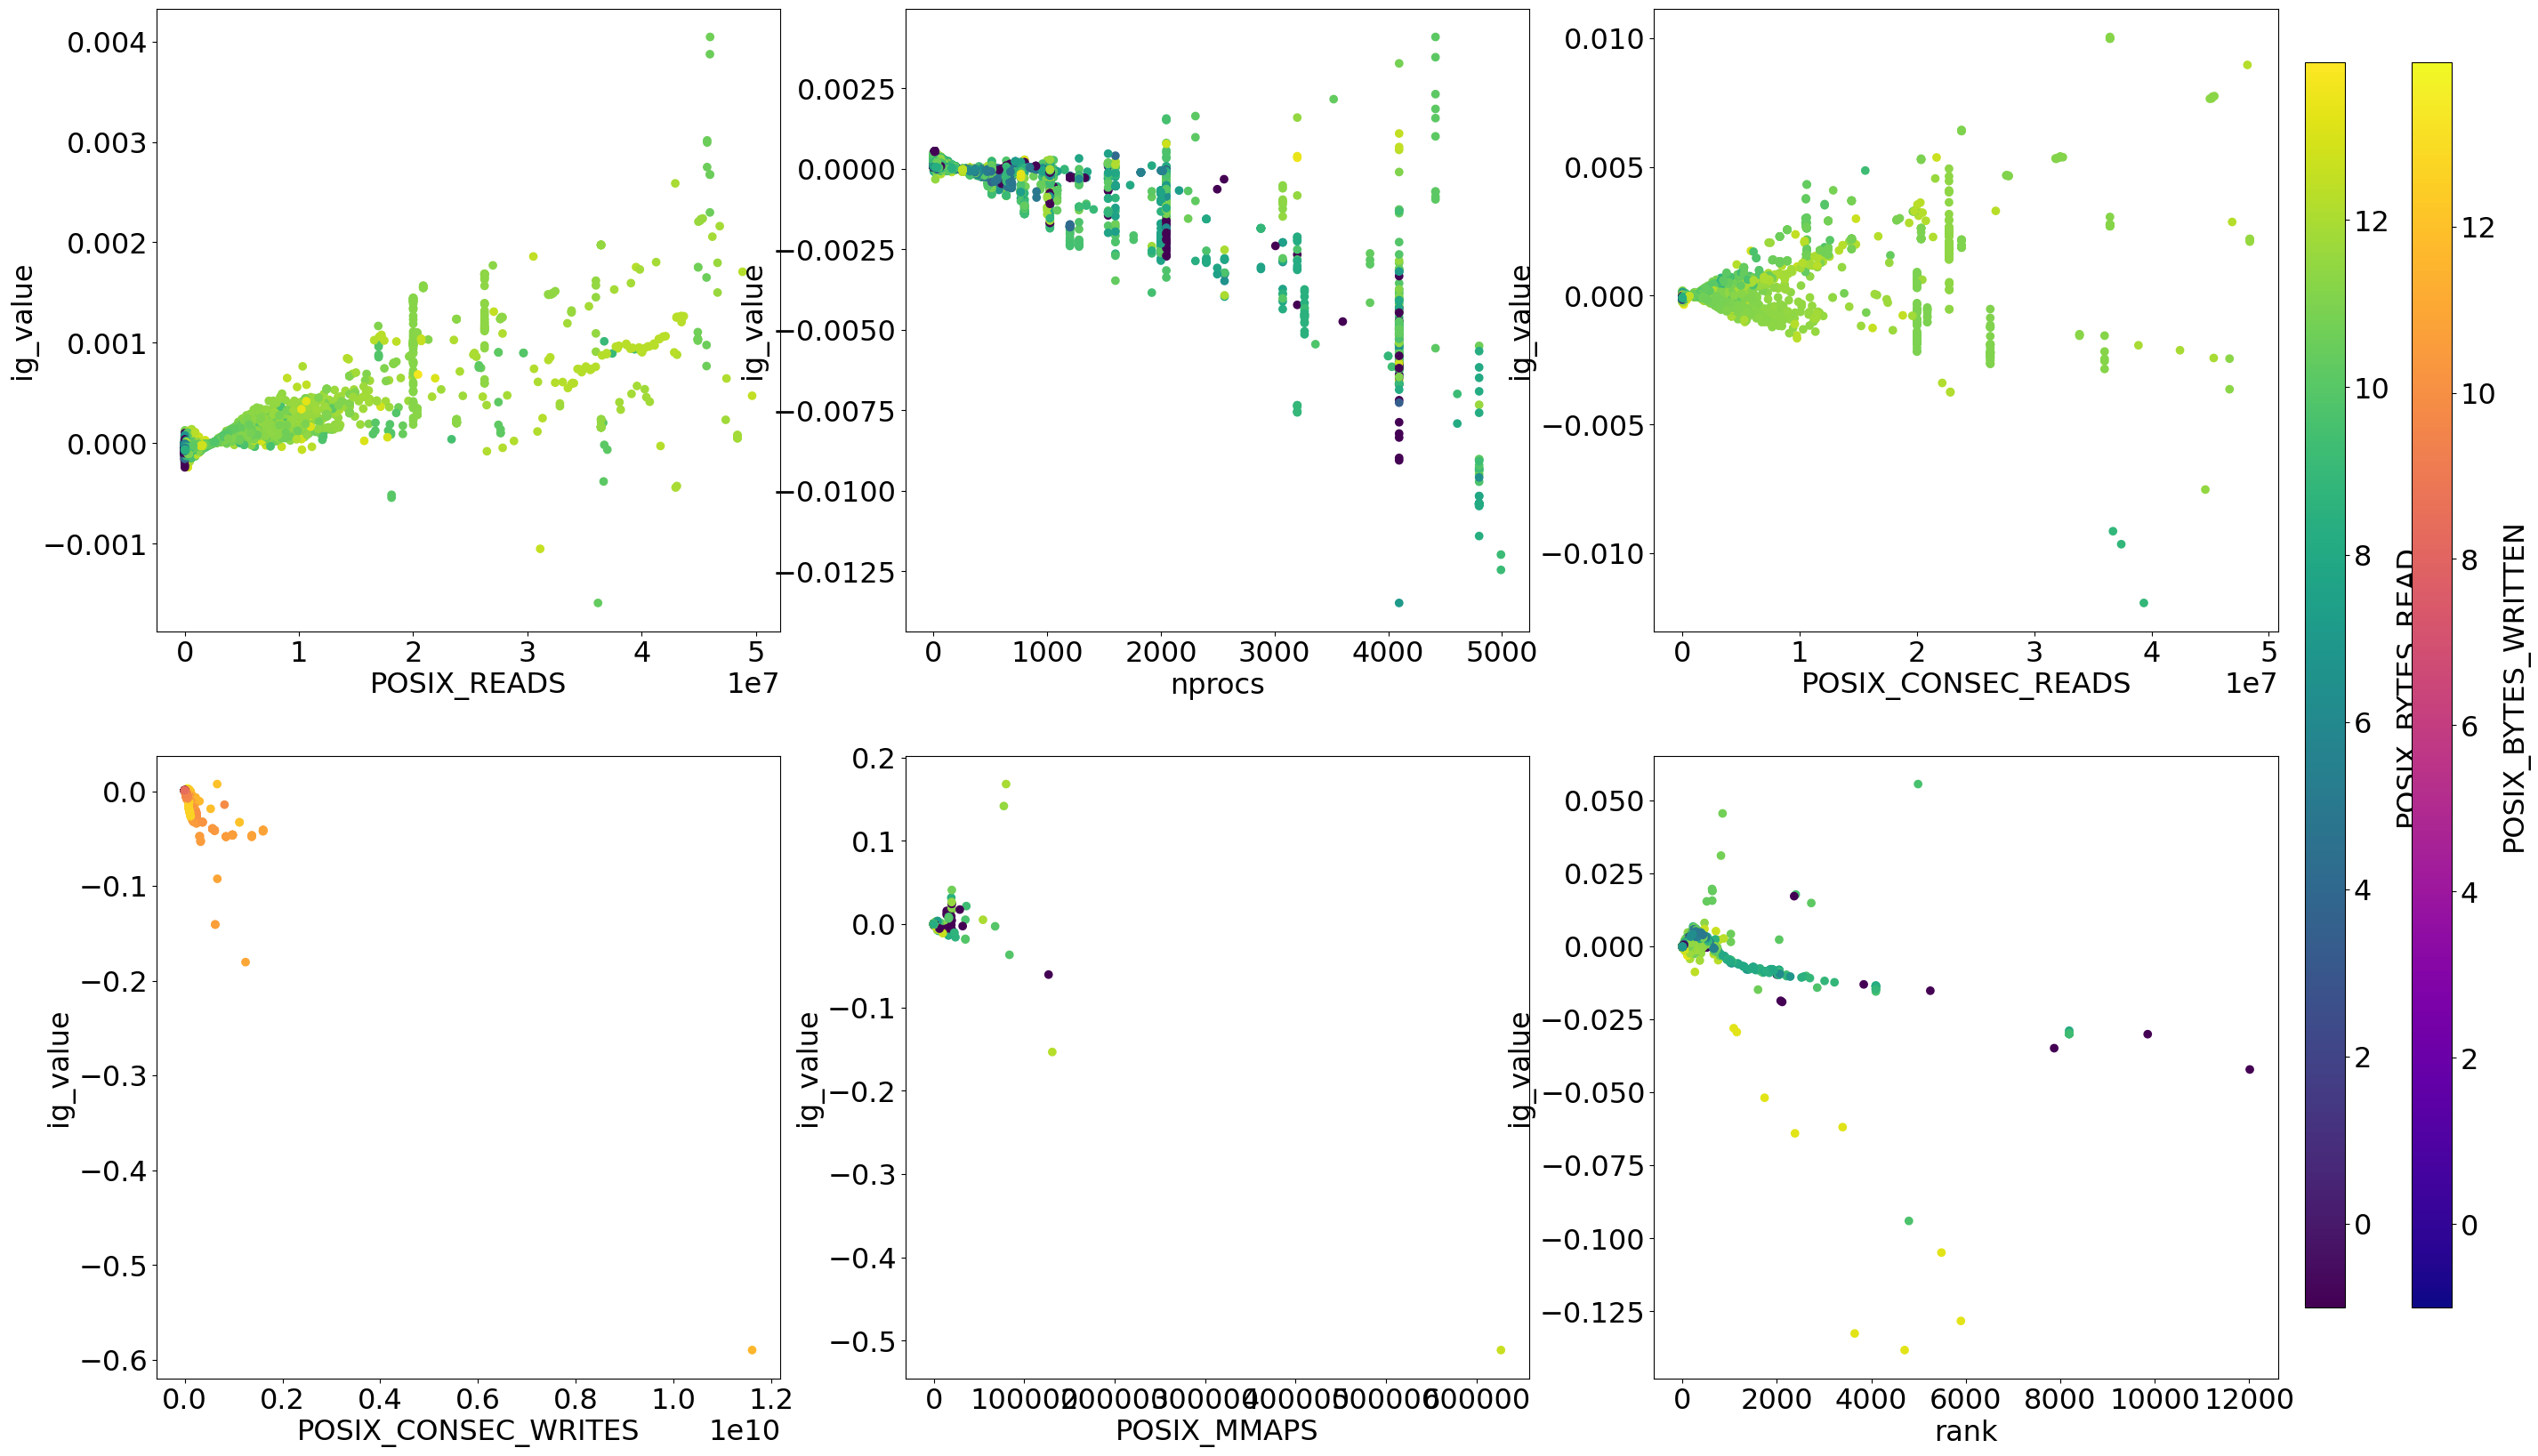

In [24]:
bytes_read_copy = df_data.POSIX_BYTES_READ.copy().where(df_data.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_data.POSIX_BYTES_WRITTEN.copy().where(df_data.POSIX_BYTES_WRITTEN > 0,0.1)
fig, axs = plt.subplots(nrows = 2, ncols=3, figsize=(30, 20))
[ax.set_ylabel("ig_value") for axs_x in axs for ax in axs_x]
reads_filter = df_data.POSIX_READS < 0.5e8
sc_read = axs[0,0].scatter(x=df_data[reads_filter].POSIX_READS,y=df[reads_filter].POSIX_READS,c=np.log10(bytes_read_copy[reads_filter]))
axs[0,0].set_xlabel("POSIX_READS")
nprocs_filter = df_data.nprocs < 5000
axs[0,1].scatter(x=df_data[nprocs_filter].nprocs,y=df[nprocs_filter].nprocs,c=np.log10(bytes_read_copy[nprocs_filter]))
axs[0,1].set_xlabel("nprocs")
consec_reads_filter = df_data.POSIX_CONSEC_READS < 0.5e8
axs[0,2].scatter(x=df_data[consec_reads_filter].POSIX_CONSEC_READS,y=df[consec_reads_filter].POSIX_CONSEC_READS,c=np.log10(bytes_read_copy[consec_reads_filter]))
axs[0,2].set_xlabel("POSIX_CONSEC_READS")
sc_written = axs[1,0].scatter(x=df_data.POSIX_CONSEC_WRITES,y=df.POSIX_CONSEC_WRITES,c=np.log10(bytes_written_copy),cmap="plasma")
axs[1,0].set_xlabel("POSIX_CONSEC_WRITES")
axs[1,1].scatter(x=df_data.POSIX_MMAPS,y=df.POSIX_MMAPS,c=np.log10(bytes_read_copy))
axs[1,1].set_xlabel("POSIX_MMAPS")
rank_filter = df_data["rank"] == -1
axs[1,2].scatter(x=df_data["rank"][rank_filter == False],y=df["rank"][rank_filter == False],c=np.log10(bytes_read_copy[rank_filter == False]))
axs[1,2].set_xlabel("rank")

fig.subplots_adjust(right=0.92)
cbar_ax_read = fig.add_axes([0.93, 0.15, 0.015, 0.7])
cbar_ax_write = fig.add_axes([0.97, 0.15, 0.015, 0.7])
fig.colorbar(sc_read,cax=cbar_ax_read, shrink=0.7,label="POSIX_BYTES_READ")
fig.colorbar(sc_written,cax=cbar_ax_write, shrink=0.7,label="POSIX_BYTES_WRITTEN")

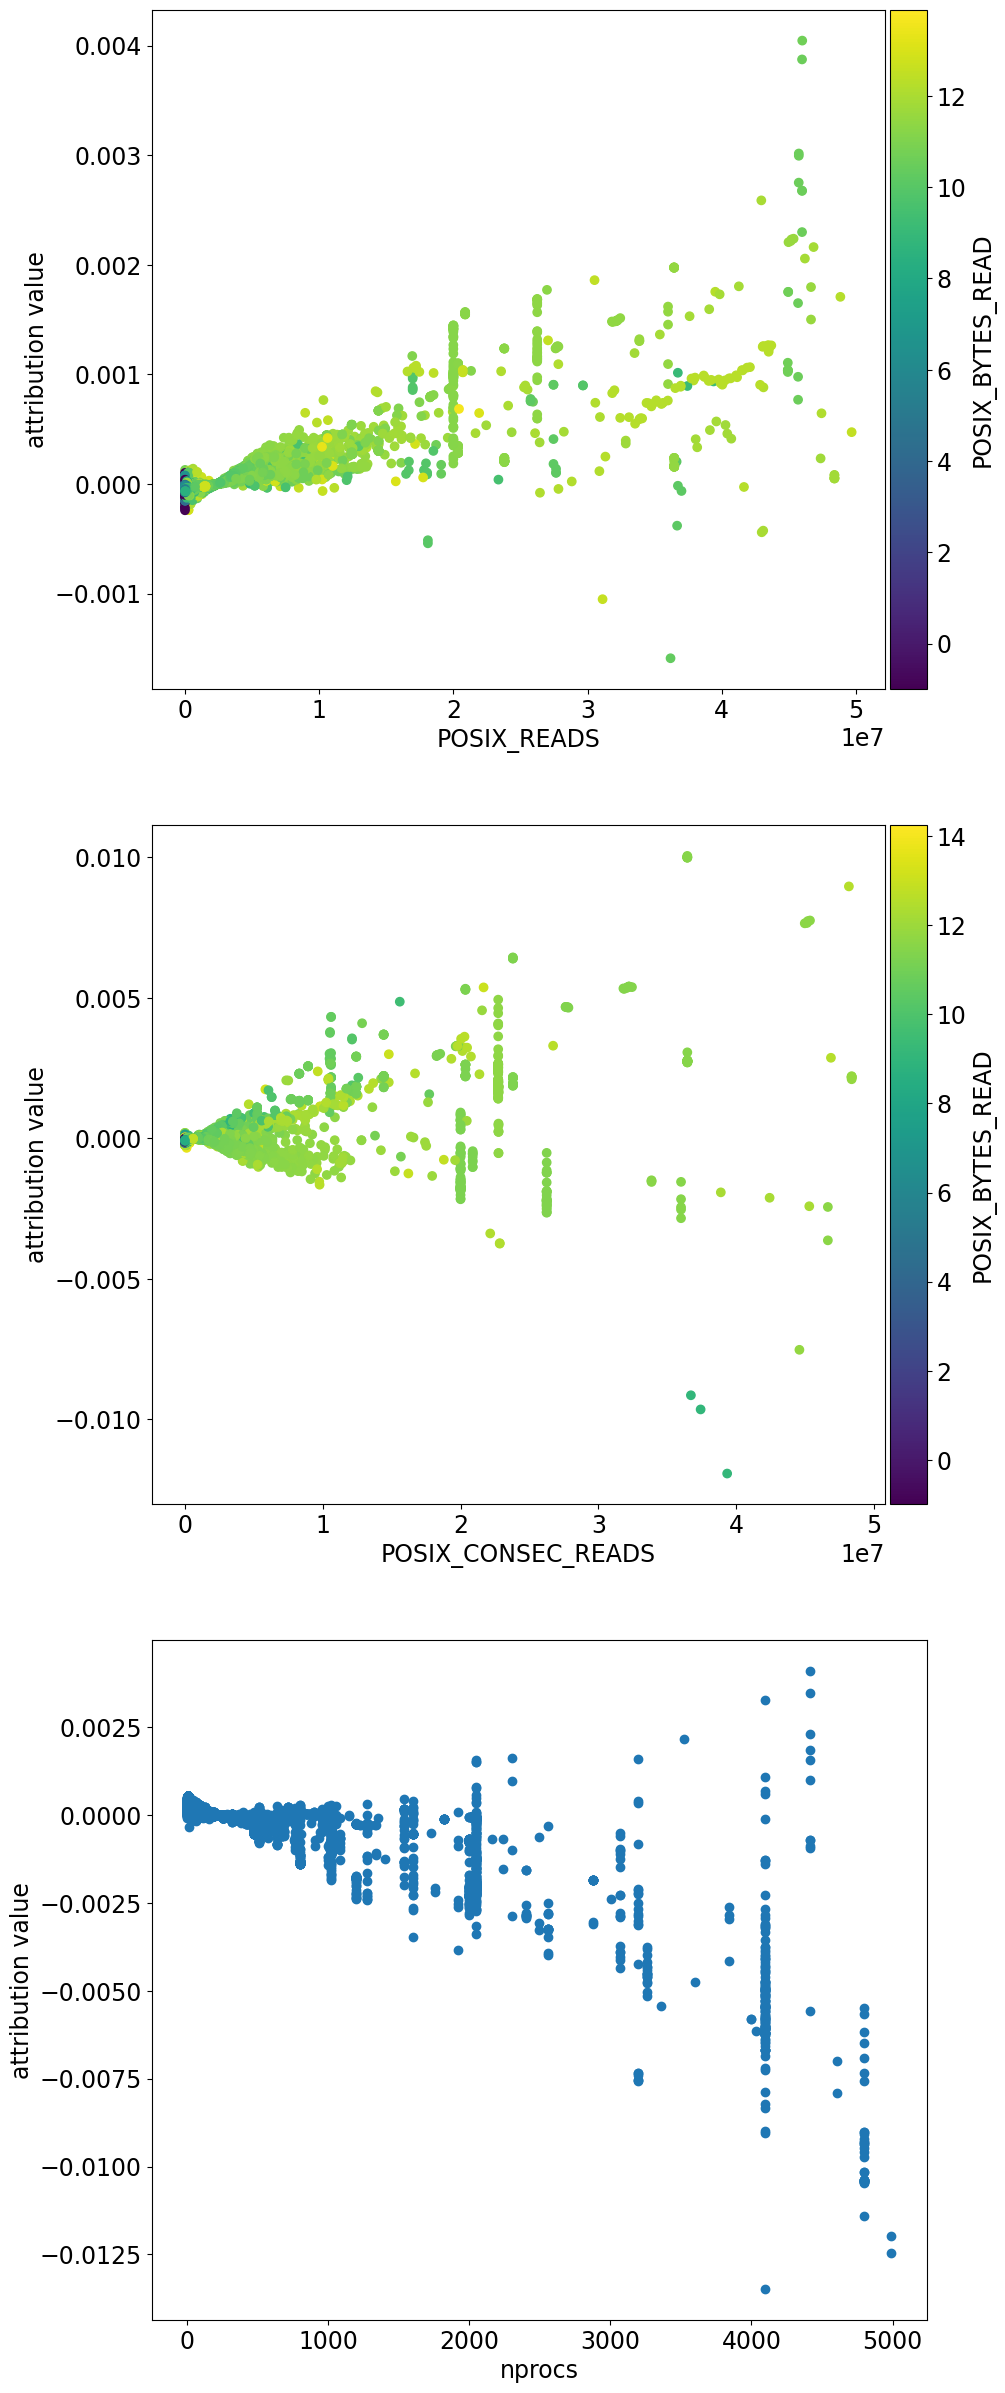

In [25]:
plt.rcParams.update({'font.size': 17})
bytes_read_copy = df_data.POSIX_BYTES_READ.copy().where(df_data.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_data.POSIX_BYTES_WRITTEN.copy().where(df_data.POSIX_BYTES_WRITTEN > 0,0.1)
fig, axs = plt.subplots(nrows = 3, ncols=1, figsize=(10, 30))
[ax.set_ylabel("attribution value") for ax in axs]
reads_filter = df_data.POSIX_READS < 0.5e8
sc_read = axs[0].scatter(x=df_data[reads_filter].POSIX_READS,y=df[reads_filter].POSIX_READS,c=np.log10(bytes_read_copy[reads_filter]))
axs[0].set_xlabel("POSIX_READS")
consec_reads_filter = df_data.POSIX_CONSEC_READS < 0.5e8
sc_consec_read = axs[1].scatter(x=df_data[consec_reads_filter].POSIX_CONSEC_READS,y=df[consec_reads_filter].POSIX_CONSEC_READS,c=np.log10(bytes_read_copy[consec_reads_filter]))
axs[1].set_xlabel("POSIX_CONSEC_READS")
nprocs_filter = df_data.nprocs < 5000
sc_nprocs = axs[2].scatter(x=df_data[nprocs_filter].nprocs,y=df[nprocs_filter].nprocs)
axs[2].set_xlabel("nprocs")

divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc_consec_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
plt.savefig("../results/interpretability/Blue_Water_captum_plot_IQR_small.png",format="png",bbox_inches="tight",dpi=600)

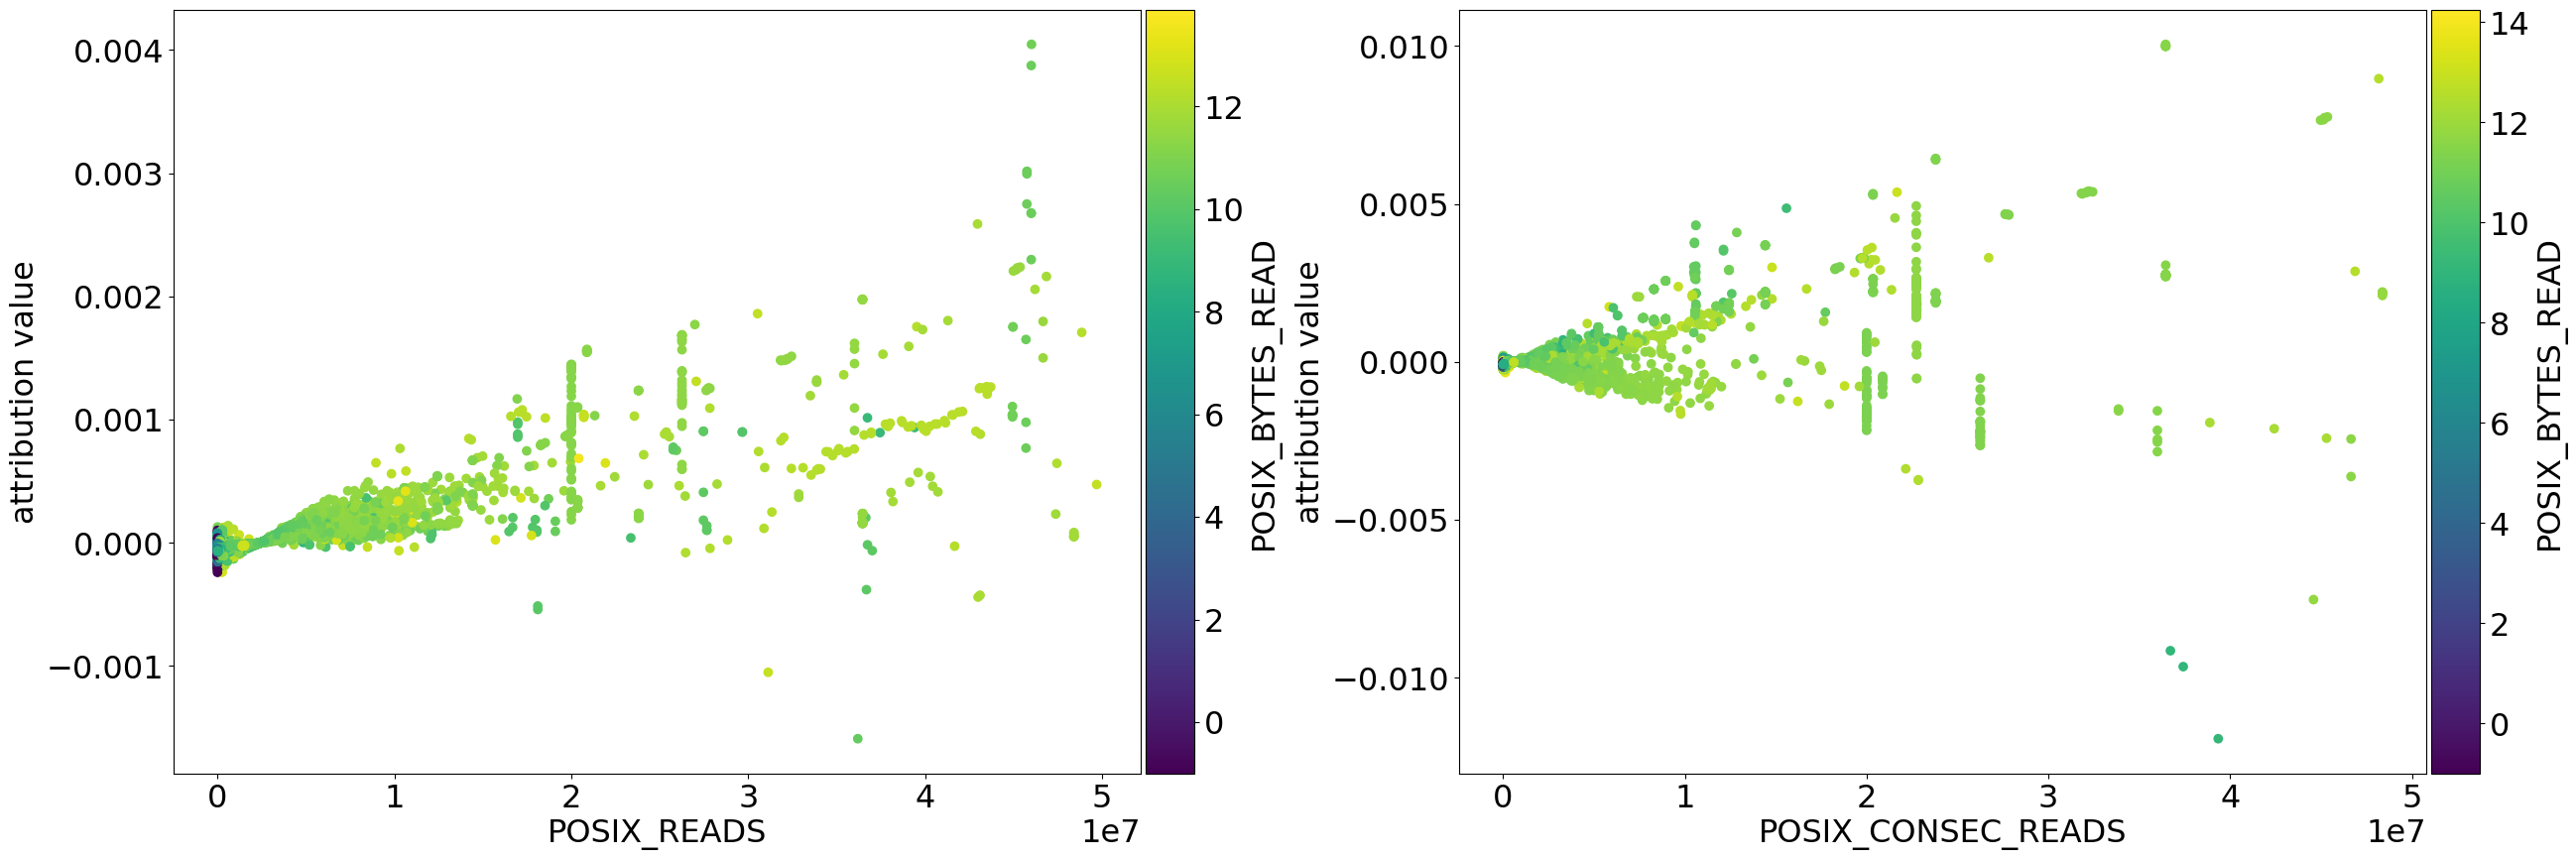

In [26]:
plt.rcParams.update({'font.size': 23})
bytes_read_copy = df_data.POSIX_BYTES_READ.copy().where(df_data.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_data.POSIX_BYTES_WRITTEN.copy().where(df_data.POSIX_BYTES_WRITTEN > 0,0.1)
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(30, 10))
plt.subplots_adjust(wspace=0.26)
[ax.set_ylabel("attribution value") for ax in axs]
reads_filter = df_data.POSIX_READS < 0.5e8
sc_read = axs[0].scatter(x=df_data[reads_filter].POSIX_READS,y=df[reads_filter].POSIX_READS,c=np.log10(bytes_read_copy[reads_filter]))
axs[0].set_xlabel("POSIX_READS")
consec_reads_filter = df_data.POSIX_CONSEC_READS < 0.5e8
sc_consec_read = axs[1].scatter(x=df_data[consec_reads_filter].POSIX_CONSEC_READS,y=df[consec_reads_filter].POSIX_CONSEC_READS,c=np.log10(bytes_read_copy[consec_reads_filter]))
axs[1].set_xlabel("POSIX_CONSEC_READS")
divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc_consec_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
plt.savefig("../results/interpretability/Blue_Water_captum_plot_IQR_small_horizontal.png",format="png",bbox_inches="tight",dpi=600)

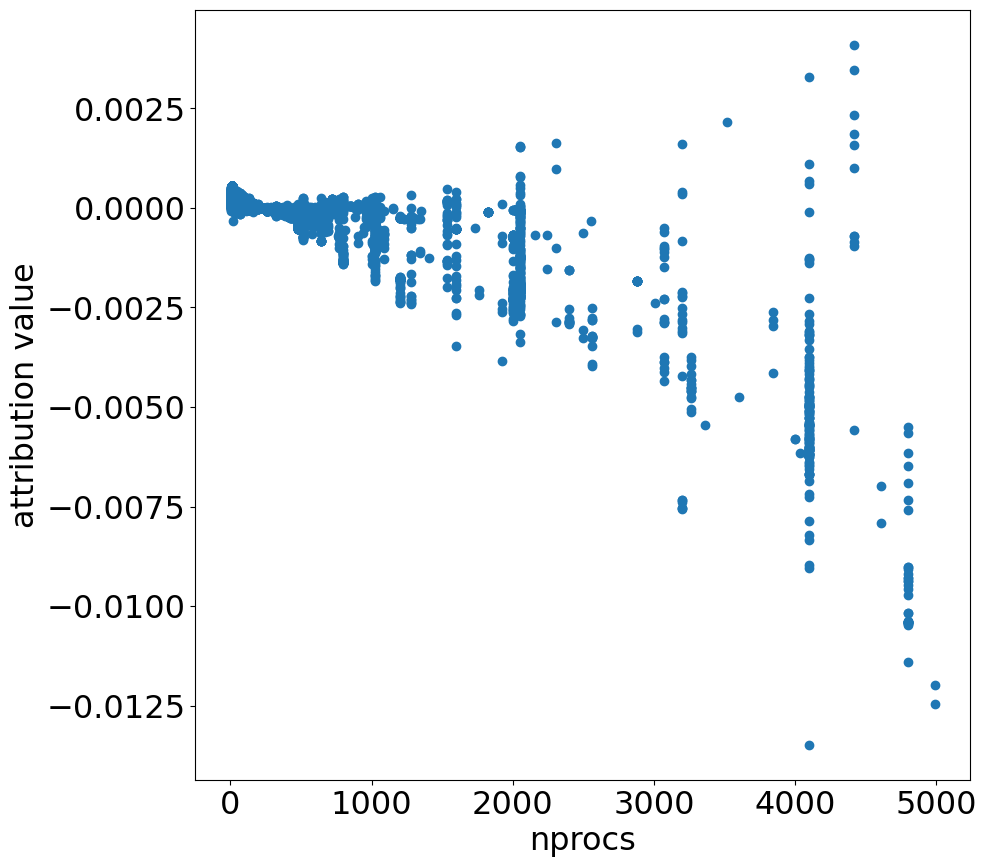

In [27]:
plt.rcParams.update({'font.size': 23})
fig, axs = plt.subplots(nrows = 1, ncols=1, figsize=(10, 10))
plt.subplots_adjust(wspace=0.26)
axs.set_ylabel("attribution value")
nprocs_filter = df_data.nprocs < 5000
sc_nprocs = axs.scatter(x=df_data[nprocs_filter].nprocs,y=df[nprocs_filter].nprocs)
axs.set_xlabel("nprocs")
plt.savefig("../results/interpretability/Blue_Water_captum_plot_IQR_nprocs.png",format="png",bbox_inches="tight",dpi=600)

### Compare to the plot for POSIX_CONSEC_READS above. Histogram does not tell anything!

<Axes: >

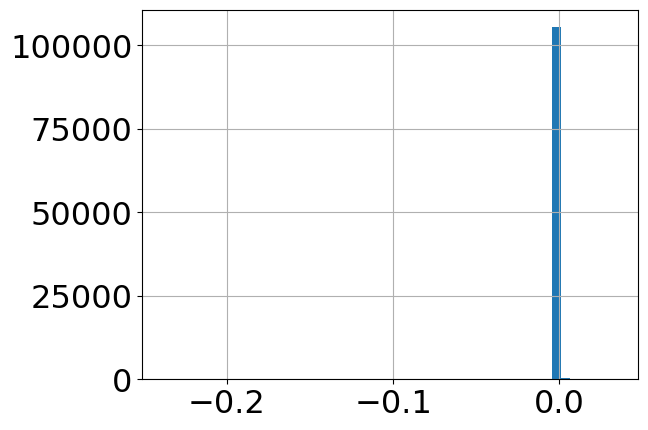

In [28]:
df.POSIX_CONSEC_READS.hist(bins=50)